In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import chardet
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [2]:
# detect encoding of the file
with open("Liver Patient Dataset (LPD)_train.csv", 'rb') as f:
    result = chardet.detect(f.read())

# 1- Read the files

In [3]:
df_train = pd.read_csv("Liver Patient Dataset (LPD)_train.csv", encoding=result['encoding'])

In [4]:
df_test = pd.read_excel("test.csv.xlsx")

In [5]:
column_names = ['Age of the patient', 'Gender of the patient', 'Total Bilirubin', 'Direct Bilirubin', 'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio']

In [6]:
df_test.columns = column_names

In [7]:
df_test.head()

Age of the patient Gender of the patient  Total Bilirubin  \
0                  50                  Male              9.4   
1                  42                Female              3.5   
2                  65                  Male              1.7   
3                  22                  Male              3.3   
4                  31                Female              1.1   

   Direct Bilirubin  Alkphos Alkaline Phosphotase  \
0               5.2                           268   
1               1.6                           298   
2               0.8                           315   
3               1.5                           214   
4               0.3                           138   

   Sgpt Alamine Aminotransferase  Sgot Aspartate Aminotransferase  \
0                             21                               63   
1                             68                              200   
2                             12                               38   
3                             54                              152   
4                             14                               21   

   Total Protiens  ALB Albumin  A/G Ratio Albumin and Globulin Ratio  
0             6.4          2.8                                   0.8  
1             7.1          3.4                                   0.9  
2             6.3          2.1                                   0.5  
3             5.1          1.8                                   0.5  
4             7.0          3.8                                   1.1

In [11]:
df_train.head()

Age of the patient Gender of the patient  Total Bilirubin  \
0                65.0                Female              0.7   
1                62.0                  Male             10.9   
2                62.0                  Male              7.3   
3                58.0                  Male              1.0   
4                72.0                  Male              3.9   

   Direct Bilirubin   Alkphos Alkaline Phosphotase  \
0               0.1                          187.0   
1               5.5                          699.0   
2               4.1                          490.0   
3               0.4                          182.0   
4               2.0                          195.0   

    Sgpt Alamine Aminotransferase  Sgot Aspartate Aminotransferase  \
0                            16.0                             18.0   
1                            64.0                            100.0   
2                            60.0                             68.0   
3                            14.0                             20.0   
4                            27.0                             59.0   

   Total Protiens   ALB Albumin  A/G Ratio Albumin and Globulin Ratio  Result  
0             6.8           3.3                                  0.90       1  
1             7.5           3.2                                  0.74       1  
2             7.0           3.3                                  0.89       1  
3             6.8           3.4                                  1.00       1  
4             7.3           2.4                                  0.40       1

In [16]:
df_train.describe()

Age of the patient  Total Bilirubin  Direct Bilirubin  \
count        30689.000000     30043.000000      30130.000000   
mean            44.107205         3.370319          1.528042   
std             15.981043         6.255522          2.869592   
min              4.000000         0.400000          0.100000   
25%             32.000000         0.800000          0.200000   
50%             45.000000         1.000000          0.300000   
75%             55.000000         2.700000          1.300000   
max             90.000000        75.000000         19.700000   

        Alkphos Alkaline Phosphotase   Sgpt Alamine Aminotransferase  \
count                   29895.000000                    30153.000000   
mean                      289.075364                       81.488641   
std                       238.537589                      182.158850   
min                        63.000000                       10.000000   
25%                       175.000000                       23.000000   
50%                       209.000000                       35.000000   
75%                       298.000000                       62.000000   
max                      2110.000000                     2000.000000   

       Sgot Aspartate Aminotransferase  Total Protiens   ALB Albumin  \
count                     30229.000000    30228.000000  30197.000000   
mean                        111.469979        6.480237      3.130142   
std                         280.851078        1.081980      0.792281   
min                          10.000000        2.700000      0.900000   
25%                          26.000000        5.800000      2.600000   
50%                          42.000000        6.600000      3.100000   
75%                          88.000000        7.200000      3.800000   
max                        4929.000000        9.600000      5.500000   

       A/G Ratio Albumin and Globulin Ratio        Result  
count                          30132.000000  30691.000000  
mean                               0.943467      1.285882  
std                                0.323164      0.451841  
min                                0.300000      1.000000  
25%                                0.700000      1.000000  
50%                                0.900000      1.000000  
75%                                1.100000      2.000000  
max                                2.800000      2.000000

In [17]:
df_train.dtypes

Age of the patient                      float64
Gender of the patient                    object
Total Bilirubin                         float64
Direct Bilirubin                        float64
 Alkphos Alkaline Phosphotase           float64
 Sgpt Alamine Aminotransferase          float64
Sgot Aspartate Aminotransferase         float64
Total Protiens                          float64
 ALB Albumin                            float64
A/G Ratio Albumin and Globulin Ratio    float64
Result                                    int64
dtype: object

In [21]:
df_train.info

<bound method DataFrame.info of        Age of the patient Gender of the patient  Total Bilirubin  \
0                    65.0                Female              0.7   
1                    62.0                  Male             10.9   
2                    62.0                  Male              7.3   
3                    58.0                  Male              1.0   
4                    72.0                  Male              3.9   
...                   ...                   ...              ...   
30686                50.0                  Male              2.2   
30687                55.0                  Male              2.9   
30688                54.0                  Male              6.8   
30689                48.0                Female              1.9   
30690                30.0                  Male              3.1   

       Direct Bilirubin   Alkphos Alkaline Phosphotase  \
0                   0.1                          187.0   
1                   5.5            

In [22]:
df_train.tail()

Age of the patient Gender of the patient  Total Bilirubin  \
30686                50.0                  Male              2.2   
30687                55.0                  Male              2.9   
30688                54.0                  Male              6.8   
30689                48.0                Female              1.9   
30690                30.0                  Male              3.1   

       Direct Bilirubin   Alkphos Alkaline Phosphotase  \
30686               1.0                          610.0   
30687               1.3                          482.0   
30688               3.0                          542.0   
30689               1.0                          231.0   
30690               1.6                          253.0   

        Sgpt Alamine Aminotransferase  Sgot Aspartate Aminotransferase  \
30686                            17.0                             28.0   
30687                            22.0                             34.0   
30688                           116.0                             66.0   
30689                            16.0                             55.0   
30690                            80.0                            406.0   

       Total Protiens   ALB Albumin  A/G Ratio Albumin and Globulin Ratio  \
30686             7.3           2.6                                  0.55   
30687             7.0           2.4                                  0.50   
30688             6.4           3.1                                  0.90   
30689             4.3           1.6                                  0.60   
30690             6.8           3.9                                  1.30   

       Result  
30686       1  
30687       1  
30688       1  
30689       1  
30690       1

# Handle Missing values and Skewness of the data

In [8]:
df_train.isnull().sum()

Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

In [9]:
df_test.isnull().sum()

Age of the patient                       0
Gender of the patient                    0
Total Bilirubin                          0
Direct Bilirubin                         0
Alkphos Alkaline Phosphotase             0
Sgpt Alamine Aminotransferase            0
Sgot Aspartate Aminotransferase          0
Total Protiens                           0
ALB Albumin                              0
A/G Ratio Albumin and Globulin Ratio    16
dtype: int64

C:\Users\amrye\AppData\Local\Temp\ipykernel_21948\675813771.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df_train.skew()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Age of the patient'),
  Text(1, 0, 'Total Bilirubin'),
  Text(2, 0, 'Direct Bilirubin'),
  Text(3, 0, '\xa0Alkphos Alkaline Phosphotase'),
  Text(4, 0, '\xa0Sgpt Alamine Aminotransferase'),
  Text(5, 0, 'Sgot Aspartate Aminotransferase'),
  Text(6, 0, 'Total Protiens'),
  Text(7, 0, '\xa0ALB Albumin'),
  Text(8, 0, 'A/G Ratio Albumin and Globulin Ratio'),
  Text(9, 0, 'Result')])

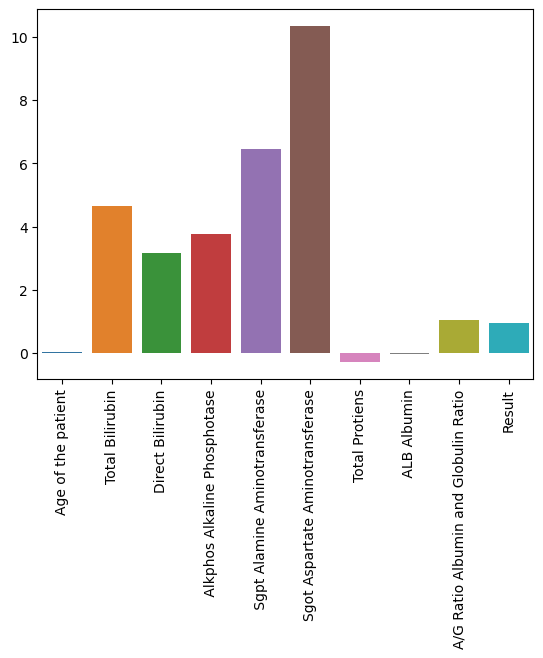

In [10]:
skewness = df_train.skew()

# Plot the skewness of each column using a barplot
sns.barplot(x=skewness.index, y=skewness.values)
plt.xticks(rotation=90)

In [11]:
print(skewness)

Age of the patient                       0.027818
Total Bilirubin                          4.664615
Direct Bilirubin                         3.156765
 Alkphos Alkaline Phosphotase            3.777566
 Sgpt Alamine Aminotransferase           6.456477
Sgot Aspartate Aminotransferase         10.344620
Total Protiens                          -0.290544
 ALB Albumin                            -0.038985
A/G Ratio Albumin and Globulin Ratio     1.057626
Result                                   0.947821
dtype: float64


In [12]:
#features after normalization
df_train['Sgot Aspartate Aminotransferase'] = df_train['Sgot Aspartate Aminotransferase'].apply(lambda x: np.log(x + 1)) 

In [13]:
#features after normalization
df_train['\xa0Sgpt Alamine Aminotransferase'] = df_train['\xa0Sgpt Alamine Aminotransferase'].apply(lambda x: np.log(x + 1)) 

In [14]:
df_train['\xa0Alkphos Alkaline Phosphotase'] = df_train['\xa0Alkphos Alkaline Phosphotase'].apply(lambda x: np.log(x + 1)) 

In [15]:
df_train['Direct Bilirubin'] = df_train['Direct Bilirubin'].apply(lambda x: np.log(x + 1)) 

In [16]:
df_train['Total Bilirubin'] = df_train['Total Bilirubin'].apply(lambda x: np.log(x + 1)) 

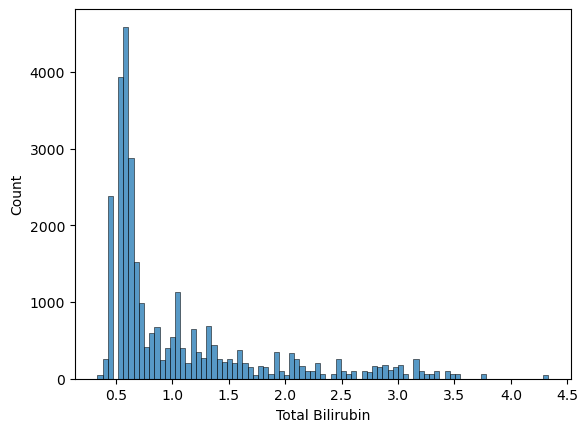

In [17]:
# Plot a histogram of the data
sns.histplot(data=df_train['Total Bilirubin'],  kde=False)
plt.show()

C:\Users\amrye\AppData\Local\Temp\ipykernel_21948\134055316.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df_test.skew()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Age of the patient'),
  Text(1, 0, 'Total Bilirubin'),
  Text(2, 0, 'Direct Bilirubin'),
  Text(3, 0, 'Alkphos Alkaline Phosphotase'),
  Text(4, 0, 'Sgpt Alamine Aminotransferase'),
  Text(5, 0, 'Sgot Aspartate Aminotransferase'),
  Text(6, 0, 'Total Protiens'),
  Text(7, 0, 'ALB Albumin'),
  Text(8, 0, 'A/G Ratio Albumin and Globulin Ratio')])

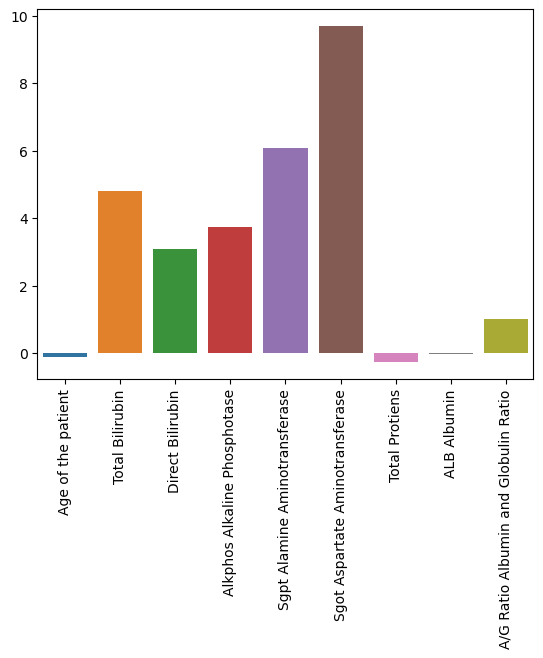

In [18]:
skewness = df_test.skew()

# Plot the skewness of each column using a barplot
sns.barplot(x=skewness.index, y=skewness.values)
plt.xticks(rotation=90)

In [19]:
print(skewness)

Age of the patient                     -0.100190
Total Bilirubin                         4.808414
Direct Bilirubin                        3.102440
Alkphos Alkaline Phosphotase            3.743495
Sgpt Alamine Aminotransferase           6.075806
Sgot Aspartate Aminotransferase         9.692425
Total Protiens                         -0.263540
ALB Albumin                            -0.030771
A/G Ratio Albumin and Globulin Ratio    1.026194
dtype: float64


In [20]:
df_test['Sgot Aspartate Aminotransferase'] = df_test['Sgot Aspartate Aminotransferase'].apply(lambda x: np.log(x + 1)) 

In [21]:

df_test['Sgpt Alamine Aminotransferase']=df_test['Sgpt Alamine Aminotransferase'].apply(lambda x: np.log(x + 1)) 

In [23]:

df_test['Alkphos Alkaline Phosphotase'] = df_test['Alkphos Alkaline Phosphotase'].apply(lambda x: np.log(x + 1)) 

In [24]:
df_test['Direct Bilirubin'] = df_test['Direct Bilirubin'].apply(lambda x: np.log(x + 1)) 

In [25]:
df_test['Total Bilirubin'] = df_test['Total Bilirubin'].apply(lambda x: np.log(x + 1)) 

### Encode the Gender column

In [26]:
df_train['Gender of the patient'] = df_train['Gender of the patient'].replace({'Female': 0, 'Male': 1})

In [27]:
df_test['Gender of the patient'] = df_test['Gender of the patient'].replace({'Female': 0, 'Male': 1})

In [28]:
df_train.head()

Age of the patient  Gender of the patient  Total Bilirubin  \
0                65.0                    0.0         0.530628   
1                62.0                    1.0         2.476538   
2                62.0                    1.0         2.116256   
3                58.0                    1.0         0.693147   
4                72.0                    1.0         1.589235   

   Direct Bilirubin   Alkphos Alkaline Phosphotase  \
0          0.095310                       5.236442   
1          1.871802                       6.551080   
2          1.629241                       6.196444   
3          0.336472                       5.209486   
4          1.098612                       5.278115   

    Sgpt Alamine Aminotransferase  Sgot Aspartate Aminotransferase  \
0                        2.833213                         2.944439   
1                        4.174387                         4.615121   
2                        4.110874                         4.234107   
3                        2.708050                         3.044522   
4                        3.332205                         4.094345   

   Total Protiens   ALB Albumin  A/G Ratio Albumin and Globulin Ratio  Result  
0             6.8           3.3                                  0.90       1  
1             7.5           3.2                                  0.74       1  
2             7.0           3.3                                  0.89       1  
3             6.8           3.4                                  1.00       1  
4             7.3           2.4                                  0.40       1

In [29]:
df_test.head()

Age of the patient  Gender of the patient  Total Bilirubin  \
0                  50                      1         2.341806   
1                  42                      0         1.504077   
2                  65                      1         0.993252   
3                  22                      1         1.458615   
4                  31                      0         0.741937   

   Direct Bilirubin  Alkphos Alkaline Phosphotase  \
0          1.824549                      5.594711   
1          0.955511                      5.700444   
2          0.587787                      5.755742   
3          0.916291                      5.370638   
4          0.262364                      4.934474   

   Sgpt Alamine Aminotransferase  Sgot Aspartate Aminotransferase  \
0                       3.091042                         4.158883   
1                       4.234107                         5.303305   
2                       2.564949                         3.663562   
3                       4.007333                         5.030438   
4                       2.708050                         3.091042   

   Total Protiens  ALB Albumin  A/G Ratio Albumin and Globulin Ratio  
0             6.4          2.8                                   0.8  
1             7.1          3.4                                   0.9  
2             6.3          2.1                                   0.5  
3             5.1          1.8                                   0.5  
4             7.0          3.8                                   1.1

In [30]:
df_train = df_train.fillna(df_train.mode().iloc[0])


In [31]:
df_train.isnull().sum()

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
 Alkphos Alkaline Phosphotase           0
 Sgpt Alamine Aminotransferase          0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
 ALB Albumin                            0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64

In [32]:
df_test=df_test.fillna(df_test.mode().iloc[0])

In [33]:
df_test.isnull().sum()

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
Alkphos Alkaline Phosphotase            0
Sgpt Alamine Aminotransferase           0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
ALB Albumin                             0
A/G Ratio Albumin and Globulin Ratio    0
dtype: int64

In [34]:
df_train['Gender of the patient'].unique()

array([0., 1.])

In [92]:
df_train.head()

Age of the patient  Gender of the patient  Total Bilirubin  \
0                65.0                    0.0         0.530628   
1                62.0                    1.0         2.476538   
2                62.0                    1.0         2.116256   
3                58.0                    1.0         0.693147   
4                72.0                    1.0         1.589235   

   Direct Bilirubin   Alkphos Alkaline Phosphotase  \
0          0.095310                       5.236442   
1          1.871802                       6.551080   
2          1.629241                       6.196444   
3          0.336472                       5.209486   
4          1.098612                       5.278115   

    Sgpt Alamine Aminotransferase  Sgot Aspartate Aminotransferase  \
0                        2.833213                         2.944439   
1                        4.174387                         4.615121   
2                        4.110874                         4.234107   
3                        2.708050                         3.044522   
4                        3.332205                         4.094345   

   Total Protiens   ALB Albumin  A/G Ratio Albumin and Globulin Ratio  Result  
0             6.8           3.3                                  0.90       1  
1             7.5           3.2                                  0.74       1  
2             7.0           3.3                                  0.89       1  
3             6.8           3.4                                  1.00       1  
4             7.3           2.4                                  0.40       1

In [104]:
df_train['Result'].unique()

array([1, 2], dtype=int64)

In [70]:
x = df_train.drop('Result', axis=1)

In [71]:
x.head()

Age of the patient  Gender of the patient  Total Bilirubin  \
0                65.0                    0.0         0.530628   
1                62.0                    1.0         2.476538   
2                62.0                    1.0         2.116256   
3                58.0                    1.0         0.693147   
4                72.0                    1.0         1.589235   

   Direct Bilirubin   Alkphos Alkaline Phosphotase  \
0          0.095310                       5.236442   
1          1.871802                       6.551080   
2          1.629241                       6.196444   
3          0.336472                       5.209486   
4          1.098612                       5.278115   

    Sgpt Alamine Aminotransferase  Sgot Aspartate Aminotransferase  \
0                        2.833213                         2.944439   
1                        4.174387                         4.615121   
2                        4.110874                         4.234107   
3                        2.708050                         3.044522   
4                        3.332205                         4.094345   

   Total Protiens   ALB Albumin  A/G Ratio Albumin and Globulin Ratio  
0             6.8           3.3                                  0.90  
1             7.5           3.2                                  0.74  
2             7.0           3.3                                  0.89  
3             6.8           3.4                                  1.00  
4             7.3           2.4                                  0.40

In [72]:
y = df_train['Result']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Result, dtype: int64

In [38]:
x_test = df_test

# Normalize the data

In [73]:
# Initialize the StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [40]:
# Initialize the StandardScaler
scaler_2 = StandardScaler()
x_test = scaler_2.fit_transform(x_test)

# 2- Visualize data

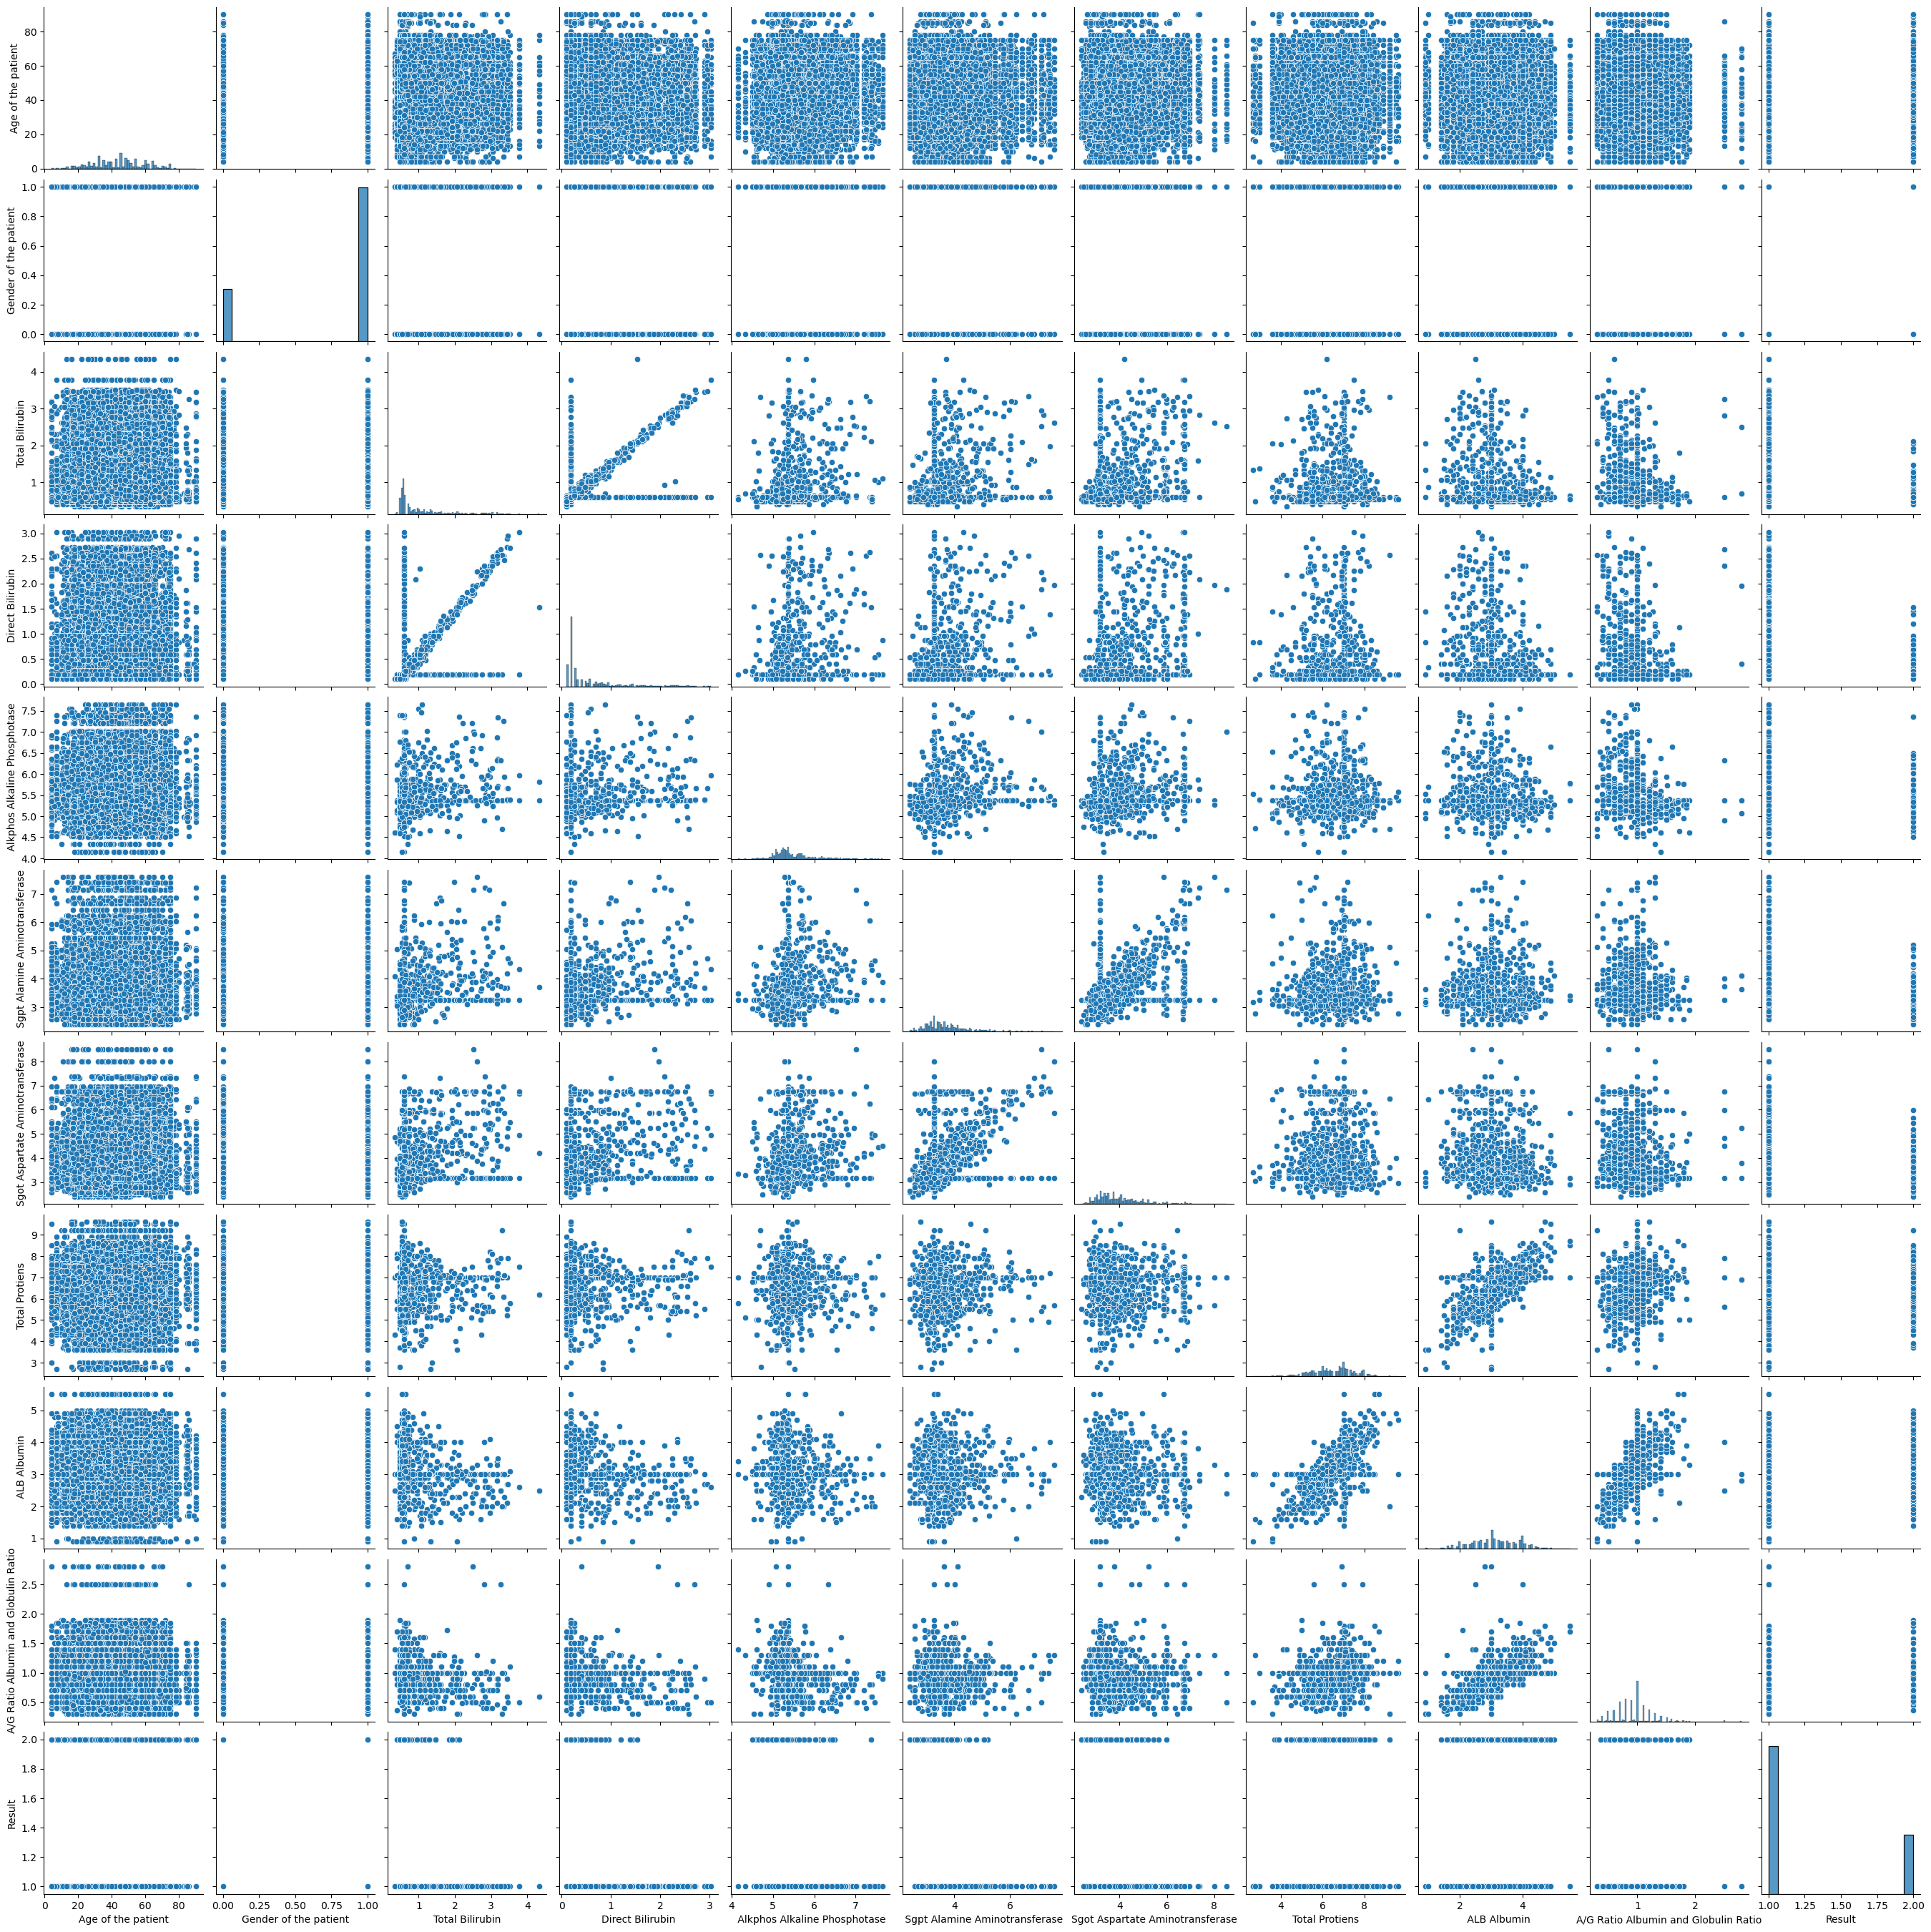

In [41]:
sns.pairplot(df_train)

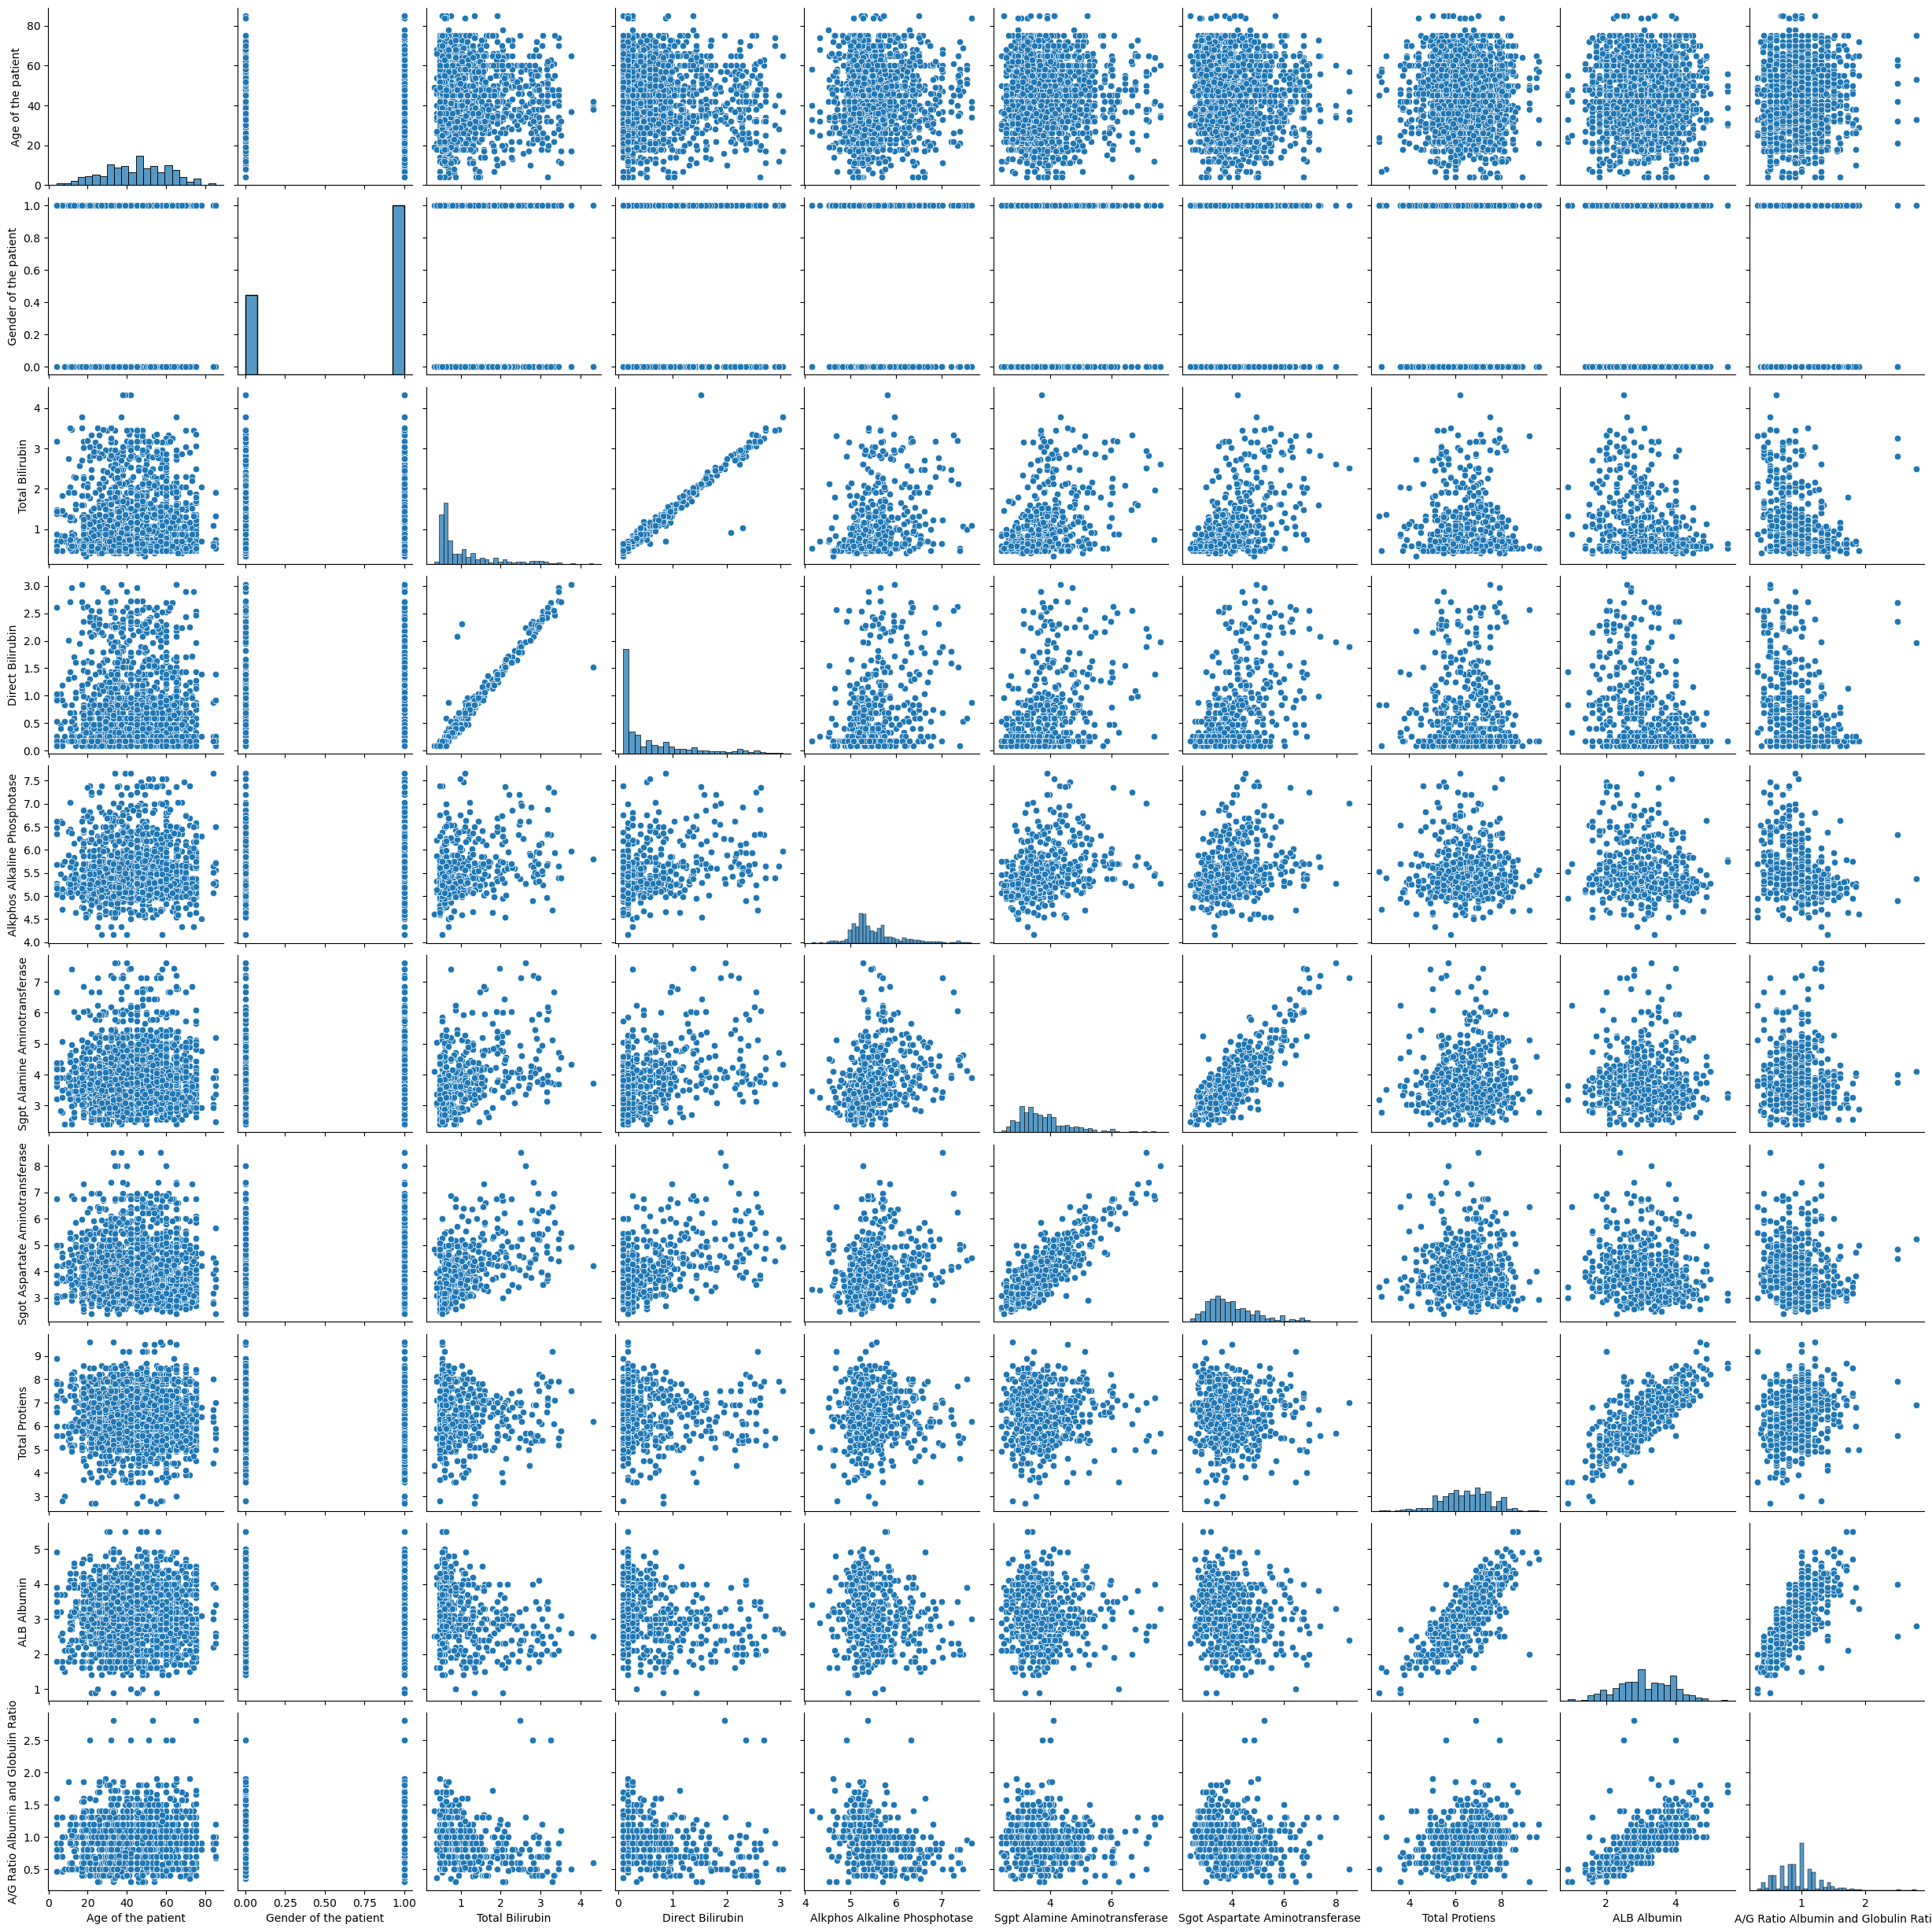

In [42]:
sns.pairplot(df_test)

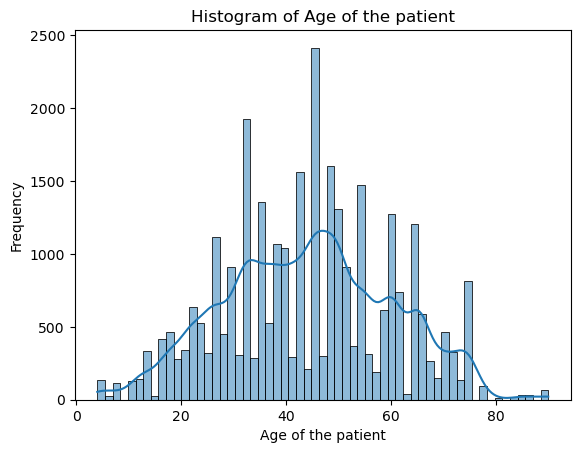

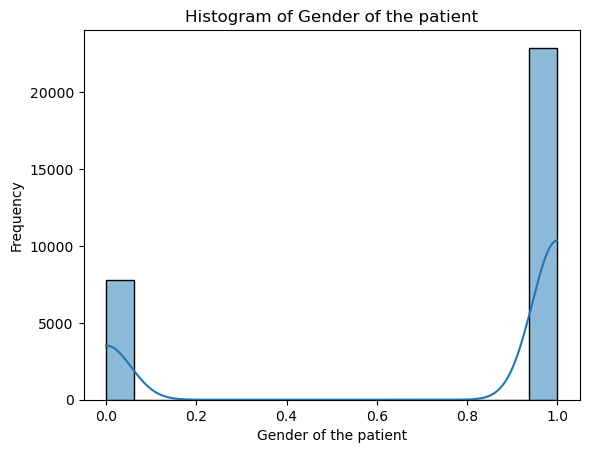

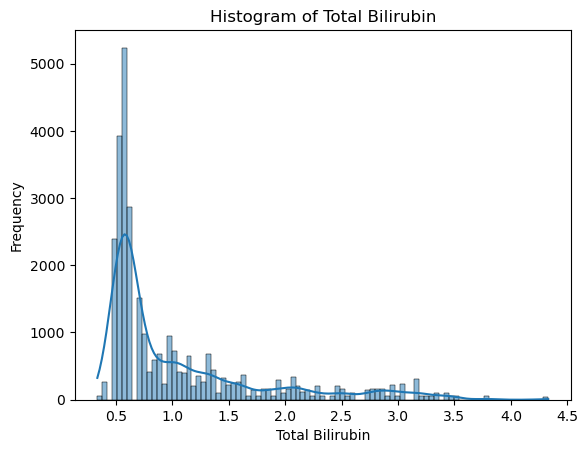

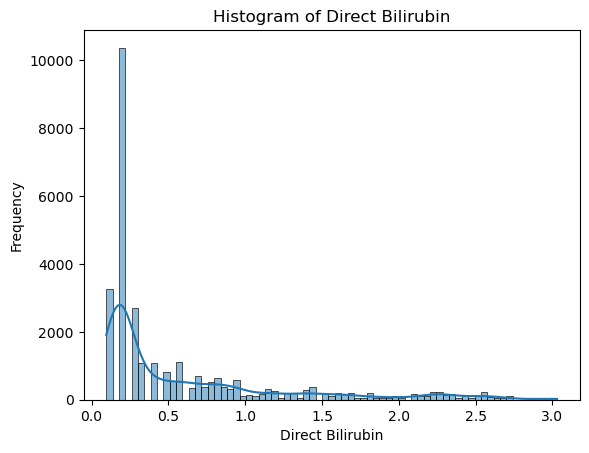

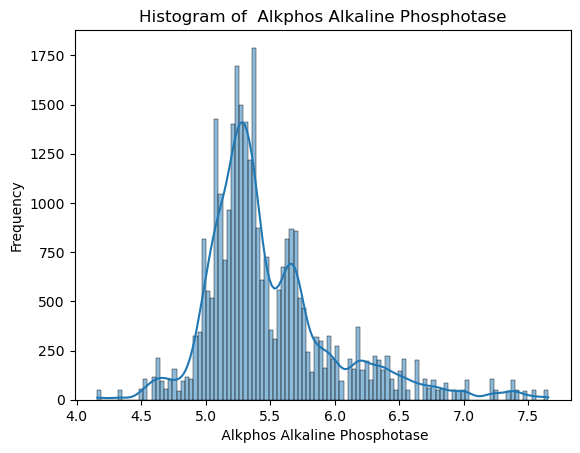

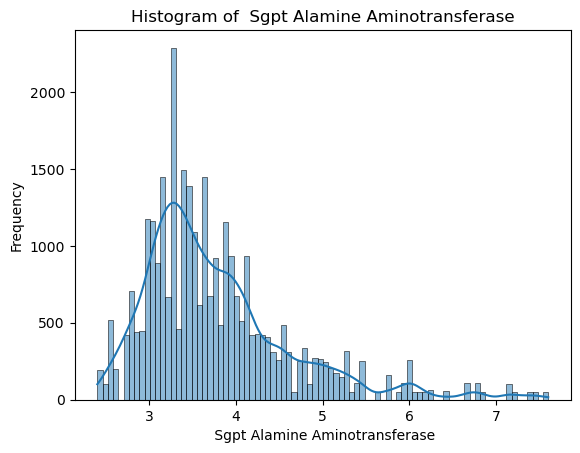

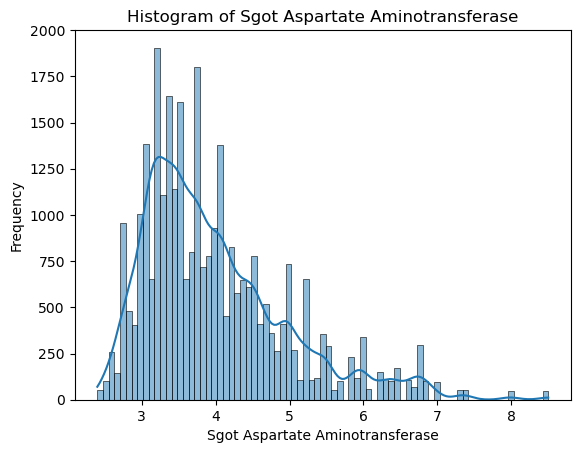

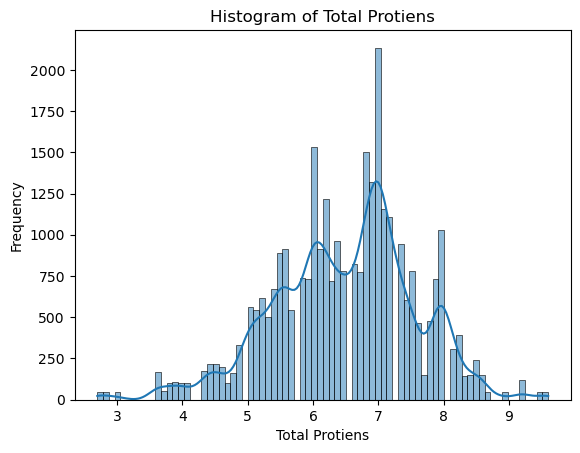

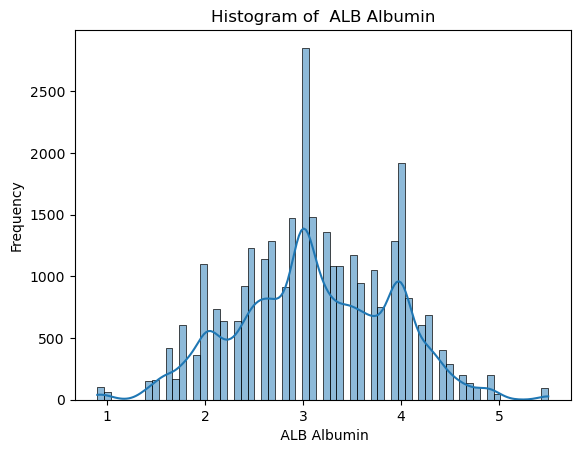

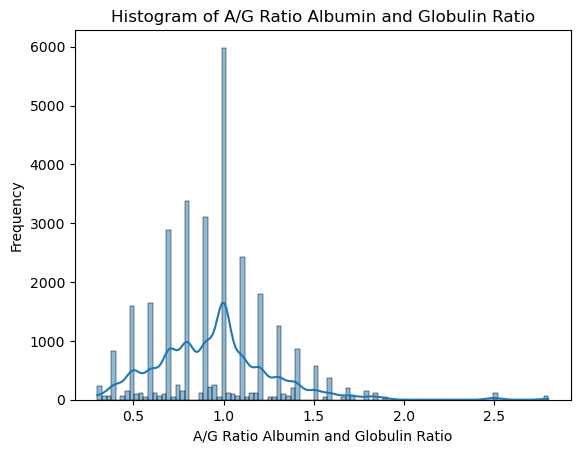

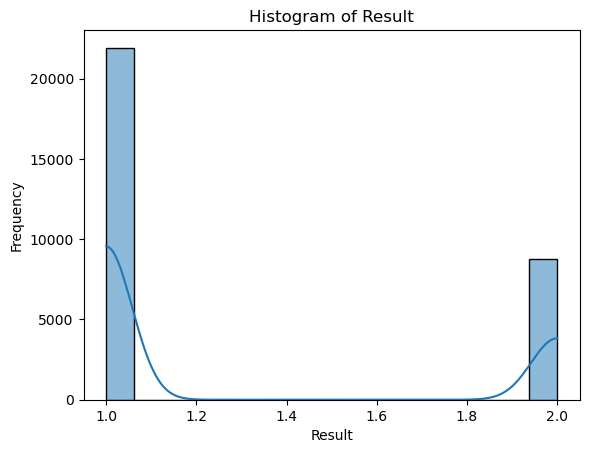

In [44]:
for column in df_train.columns:
    sns.histplot(df_train[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# 3- Create the algorithm (PCA)

In [74]:
pca = PCA(n_components=5)
x_pca = pca.fit_transform(x)

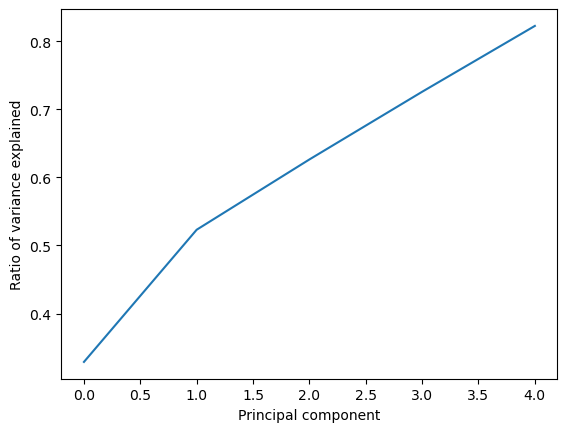

In [75]:
# Investigate the variance accounted for by each principal component.
plt.plot(range(len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal component")
plt.ylabel("Ratio of variance explained")
plt.show()

In [76]:
x_pca.shape

(30691, 5)

In [77]:
x.shape

(30691, 10)

In [78]:
pca = PCA(n_components=5)
x_pca_test = pca.fit_transform(x_test)

In [79]:
x_pca.shape

(30691, 5)

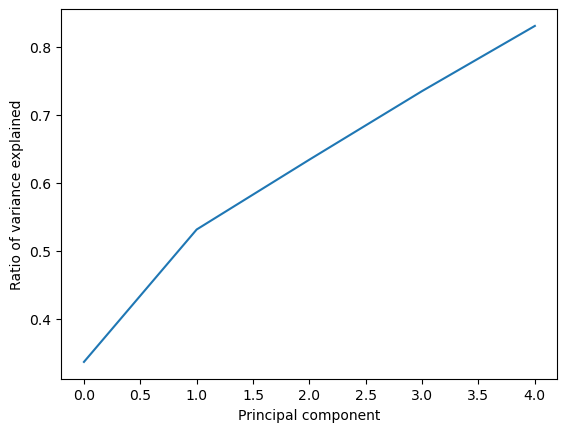

In [80]:
# Investigate the variance accounted for by each principal component.
plt.plot(range(len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal component")
plt.ylabel("Ratio of variance explained")
plt.show()

# Split the data

In [83]:
x_train, X_val, y_train, y_val = train_test_split(x_pca, y, test_size=0.2, random_state=42)

# 4- Choose the algorithm to predict

In [81]:
d_tree = DecisionTreeClassifier(random_state=42)
r_forest = RandomForestClassifier(random_state=42)

In [85]:
d_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [86]:
r_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [88]:
y_pred_decision_tree = d_tree.predict(X_val)
y_pred_random_forest = r_forest.predict(X_val)

# Evaluation

In [96]:
print("accuracy for Decision tree = {}".format(accuracy_score(y_val, y_pred_decision_tree) * 100))
print("accuracy for Random forest = {}".format(accuracy_score(y_val, y_pred_random_forest) * 100))

accuracy for Decision tree = 97.2471086496172
accuracy for Random forest = 98.27333441928653


In [97]:
print(classification_report(y_val , y_pred_decision_tree))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98      4429
           2       0.96      0.95      0.95      1710

    accuracy                           0.97      6139
   macro avg       0.97      0.96      0.97      6139
weighted avg       0.97      0.97      0.97      6139



In [98]:
print(classification_report(y_val , y_pred_random_forest))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99      4429
           2       0.98      0.96      0.97      1710

    accuracy                           0.98      6139
   macro avg       0.98      0.98      0.98      6139
weighted avg       0.98      0.98      0.98      6139



In [101]:
matrix_Tree = confusion_matrix(y_val, y_pred_decision_tree)

In [105]:
def visualize_confusion_matrix(matrix):
    # Plot the confusion matrix as a heatmap
    fig, ax = plt.subplots()
    im = ax.imshow(matrix, cmap='Blues')

    # Add labels to the plot
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['True Negative', 'True Positive'])
    ax.set_yticklabels(['True Negative', 'True Positive'])
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    # Add the colorbar to the plot
    cbar = ax.figure.colorbar(im, ax=ax)

    # Show the plot
    plt.show()

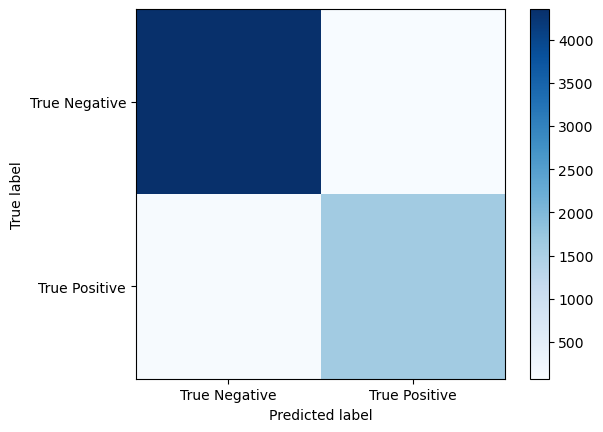

[[4353   76]
 [  93 1617]]


In [109]:
visualize_confusion_matrix(matrix_Tree)
print(matrix_Tree)

In [107]:
matrix_forest = confusion_matrix(y_val, y_pred_random_forest)

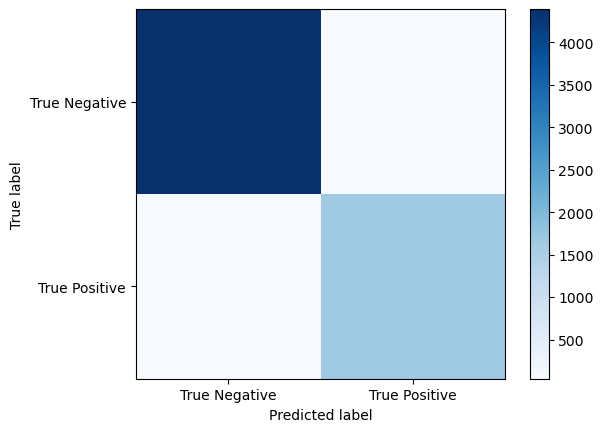

[[4390   39]
 [  67 1643]]


In [110]:
visualize_confusion_matrix(matrix_forest)
print(matrix_forest)

In [111]:
def scatter_plot(y_test, y_pred):
    # Create a scatter plot of the true labels vs. the predicted labels
    plt.scatter(y_test, y_pred)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.show()

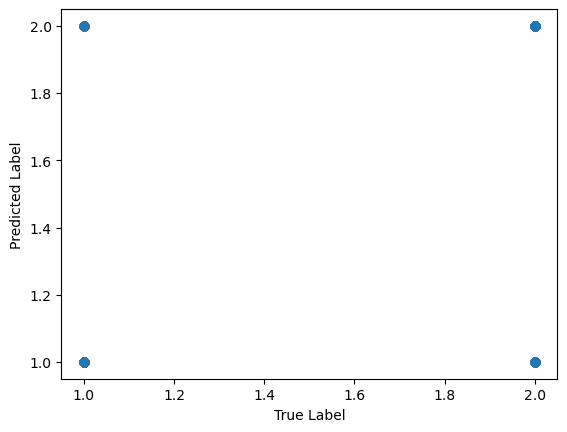

In [112]:
scatter_plot(y_val, y_pred_decision_tree)

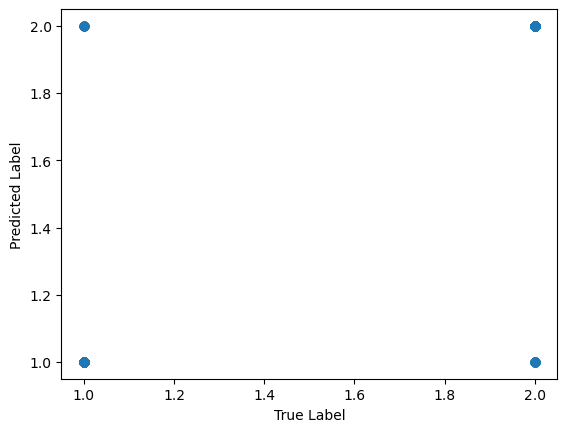

In [113]:
scatter_plot(y_val, y_pred_random_forest)

# 5- Check the effictiveness
### predict the test data and add the results into the excel sheet

In [116]:
y_pred = r_forest.predict(x_pca_test)

In [118]:
output_df = pd.DataFrame({'Result': y_pred})

In [119]:
# Append the predictions DataFrame to the existing DataFrame
combined_df = pd.concat([df_test, output_df], axis=1)

# Write the combined DataFrame back to the Excel sheet
combined_df.to_excel('test.xlsx', index=False)